# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [22]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    weather_api_key = "9ee92eba9a706c55ea1fa3afd7e8b3b4"
    
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | san marcos de colon
Processing Record 3 of Set 1 | cuamba
Processing Record 4 of Set 1 | leh
Processing Record 5 of Set 1 | constantia
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | tokar
Processing Record 9 of Set 1 | okhotsk
Processing Record 10 of Set 1 | puerto la cruz
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | cannonvale
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | siwa oasis
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | santiago de cao
Processing Record 19 of Set 1 | cassilandia
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | yellowknife
Processing Re

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,14.54,72,64,2.68,ZA,1686542091
1,san marcos de colon,13.4333,-86.8000,20.01,93,96,0.80,HN,1686542091
2,cuamba,-14.8031,36.5372,13.21,70,0,0.37,MZ,1686542091
3,leh,34.1667,77.5833,12.62,43,83,1.06,IN,1686542091
4,constantia,44.1833,28.6500,16.50,83,72,8.90,RO,1686542091


In [45]:
# Export the City_Data into a csv
if not os.path.exists('output_data'):
    os.makedirs('output_data')
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,14.54,72,64,2.68,ZA,1686542091
1,san marcos de colon,13.4333,-86.8000,20.01,93,96,0.80,HN,1686542091
2,cuamba,-14.8031,36.5372,13.21,70,0,0.37,MZ,1686542091
3,leh,34.1667,77.5833,12.62,43,83,1.06,IN,1686542091
4,constantia,44.1833,28.6500,16.50,83,72,8.90,RO,1686542091


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

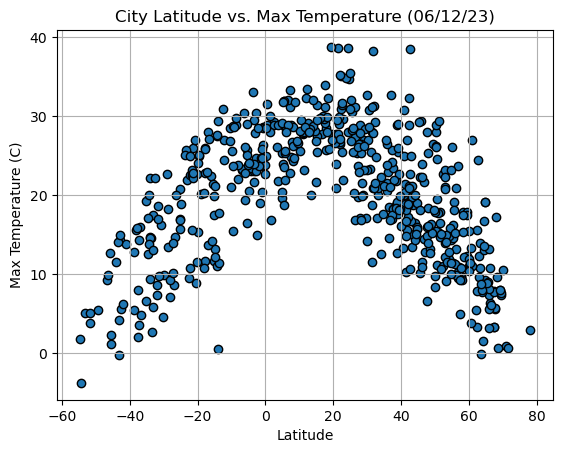

In [62]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", label="Cities")

# Incorporate the other graph properties

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

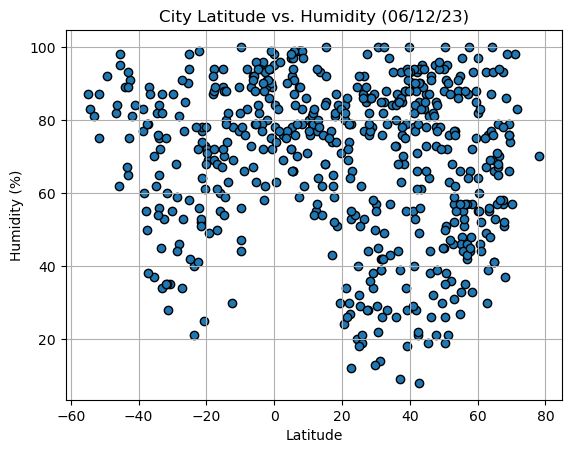

In [60]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

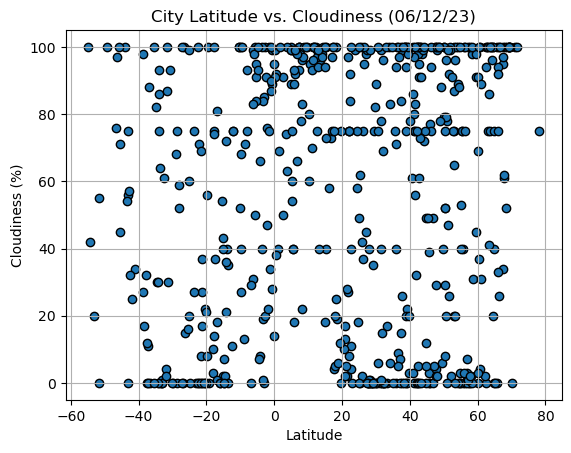

In [59]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o",label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

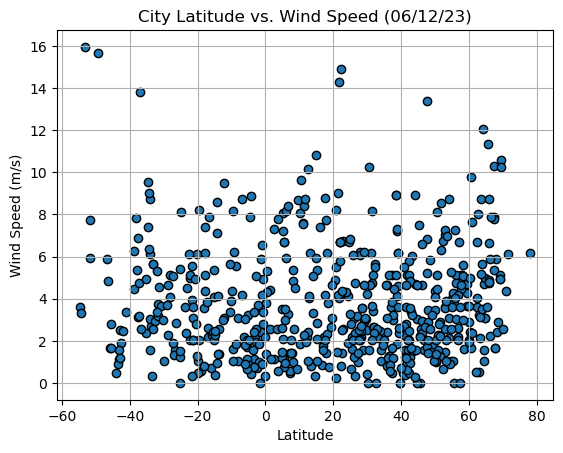

In [58]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [83]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
from scipy.stats import linregress

def plot_regression(x, y, title, ylabs, coor):
    # calc regression
    (slope, intercept, r_value, _, _) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    #scatter plot and regression line
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    plt.text(text_position[0], text_position[1], line_eq, fontsize=12, color="red", transform=plt.gca().transAxes)
    plt.ylabel(ylabs)
    plt.xlabel('Latitude')
    plt.title(title)
    plt.show()


In [69]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,san marcos de colon,13.4333,-86.8000,20.01,93,96,0.80,HN,1686542091
3,leh,34.1667,77.5833,12.62,43,83,1.06,IN,1686542091
4,constantia,44.1833,28.6500,16.50,83,72,8.90,RO,1686542091
7,tokar,18.4254,37.7290,32.36,51,19,3.79,SD,1686542091
8,okhotsk,59.3833,143.3000,12.28,75,45,4.26,RU,1686542091


In [68]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,14.54,72,64,2.68,ZA,1686542091
2,cuamba,-14.8031,36.5372,13.21,70,0,0.37,MZ,1686542091
5,puerto natales,-51.7236,-72.4875,3.84,87,55,5.94,CL,1686542091
6,edinburgh of the seven seas,-37.0676,-12.3116,16.04,89,88,13.80,SH,1686542076
10,codrington,-38.2667,141.9667,15.66,60,17,7.82,AU,1686542091


###  Temperature vs. Latitude Linear Regression Plot

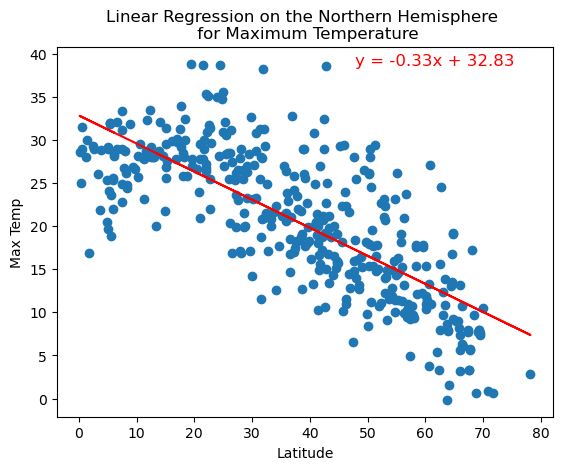

The r-value is: 0.5739957534848704


In [98]:
# Linear regression on Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Max Temp"]
title = 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature'
ylabs = 'Max Temp'
text_position = (0.6, 0.95)

# Call the function
plot_regression(x_val, y_val, title, ylabs, coor)

# Print the r-value
(slope, intercept, r_value, _, _) = linregress(x_values, y_values)
print(f"The r-value is: {r_value**2}")


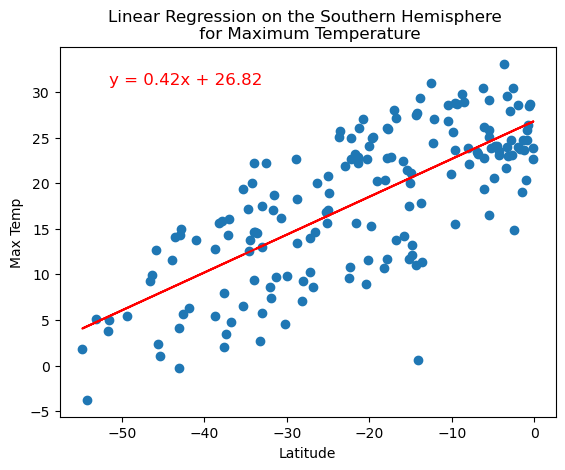

The r-value is: 0.5450761564026888


In [90]:
# Linear regression on Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Max Temp"]
title = 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature'
ylabs = 'Max Temp'
text_position = (0.1, 0.9) 

# Call the function
plot_regression(x_val, y_val, title, ylabs, text_position)

# Print the r-value
(slope, intercept, r_value, _, _) = linregress(x_val, y_val)
print(f"The r-value is: {r_value**2}")


**Discussion about the linear relationship:** 

In the Northern Hemisphere, there is a moderate negative relationship between latitude and temperature, as depicted by the linear regression equation y = -0.33x + 32.83, with an R-squared value of 0.574. This suggests that as one moves further from the equator, the temperature tends to decrease; specifically, for each unit increase in latitude, the temperature decreases by 0.33 units. Conversely, in the Southern Hemisphere, the relationship between latitude and temperature is moderately positive, with a linear regression equation of y = 0.42x + 26.82 and an R-squared value of 0.545. This indicates that as one moves closer to the equator in the Southern Hemisphere, the temperature tends to increase by 0.42 units for each unit increase in latitude. In summary, temperatures are influenced by latitude in both hemispheres, but in opposite directions: in the Northern Hemisphere, temperatures decrease with increasing latitude, while in the Southern Hemisphere, they increase as one approaches the equator. The regression models capture these geographically intuitive trends effectively.

### Humidity vs. Latitude Linear Regression Plot

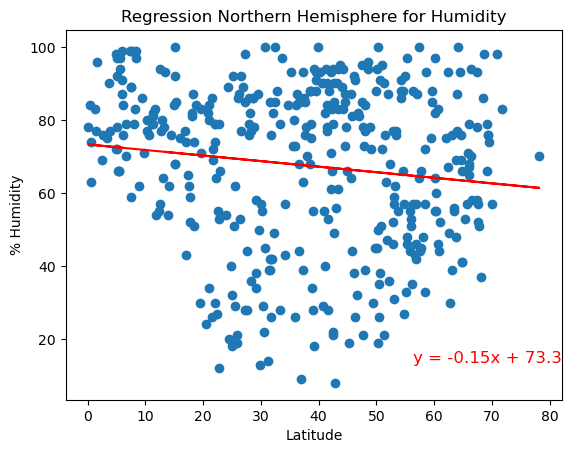

The r-value is: 0.016877218382410773


In [102]:
# Northern Hemisphere
# YOUR CODE HERE
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Humidity"]
ylabs = '% Humidity'
text_position = (0.7, 0.1) 
title = 'Regression Northern Hemisphere for Humidity'


# Call the function
plot_regression(x_val, y_val, title, ylabs, text_position)

# Print the r-value
(slope, intercept, r_value, _, _) = linregress(x_val, y_val)
print(f"The r-value is: {r_value**2}")

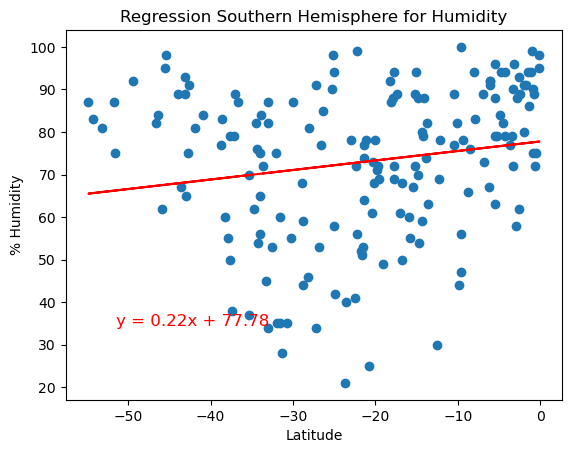

The r-value is: 0.031783398157394074


In [103]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Humidity"]
title = 'Regression Southern Hemisphere for Humidity'
ylabs = '% Humidity'
text_position = (0.1, 0.2) # Adjusting the relative position here

# Call the function
plot_regression(x_val, y_val, title, ylabs, text_position)

# Print the r-value
(slope, intercept, r_value, _, _) = linregress(x_val, y_val)
print(f"The r-value is: {r_value**2}")

**Discussion about the linear relationship:** 


In the Northern Hemisphere, the relationship between latitude and humidity is very weak, as indicated by the linear regression equation y = -0.15x + 73.3, with an R-squared value of only 0.017. This suggests that latitude has minimal impact on humidity levels in the Northern Hemisphere. Essentially, there is a very slight tendency for humidity to decrease as one moves further from the equator, but the effect is not pronounced. On the other hand, in the Southern Hemisphere, the relationship between latitude and humidity is also weak but slightly positive, with a linear regression equation of y = 0.22x + 77.78 and an R-squared value of 0.032. This indicates a marginal increase in humidity levels as one moves closer to the equator in the Southern Hemisphere. However, similar to the Northern Hemisphere, the effect is very subtle. In summary, humidity levels do not seem to be strongly influenced by latitude in either hemisphere, and other factors likely play a more significant role in determining humidity levels in different regions.

### Cloudiness vs. Latitude Linear Regression Plot

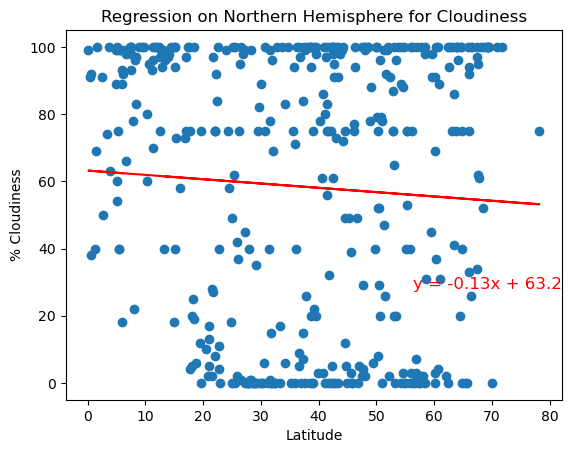

The r-value is: 0.0037119874487394223


In [106]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Cloudiness"]
title = 'Regression on Northern Hemisphere for Cloudiness'
ylabs = '% Cloudiness'
text_position = (0.7, 0.3) # Adjusting the relative position here

# Call the function
plot_regression(x_val, y_val, title, ylabs, text_position)

# Print the r-value
(slope, intercept, r_value, _, _) = linregress(x_val, y_val)
print(f"The r-value is: {r_value**2}")

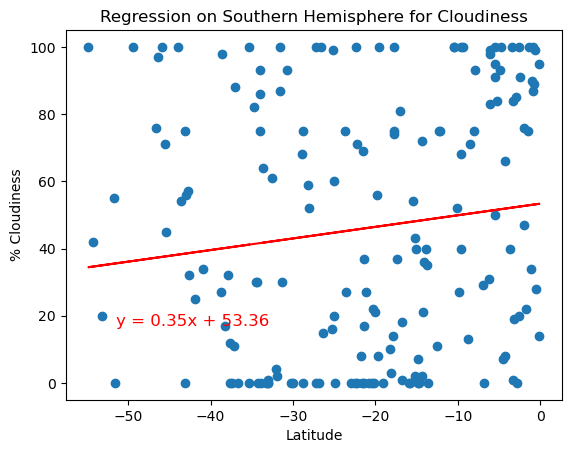

The r-value is: 0.01726140591027835


In [108]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Cloudiness"]
title = 'Regression on Southern Hemisphere for Cloudiness'
ylabs = '% Cloudiness'
text_position = (0.1, 0.2) # Adjusting the relative position here

# Call the function
plot_regression(x_val, y_val, title, ylabs, text_position)

# Print the r-value
(slope, intercept, r_value, _, _) = linregress(x_val, y_val)
print(f"The r-value is: {r_value**2}")

**Discussion about the linear relationship:** 



In the Northern Hemisphere, the relationship between latitude and cloudiness is very weak, as evidenced by the linear regression equation y = -0.13x + 63.2 and an R-squared value of 0.0037. This indicates that there is hardly any correlation between latitude and cloudiness in the Northern Hemisphere, and the slight negative slope suggests that cloudiness marginally decreases as one moves away from the equator, but this is not statistically significant. Similarly, in the Southern Hemisphere, the correlation between latitude and cloudiness is also very weak, as indicated by the equation y = 0.35x + 53.36 and an R-squared value of 0.0173. However, in contrast to the Northern Hemisphere, the Southern Hemisphere shows a slight positive correlation, indicating that cloudiness may increase marginally as one moves closer to the equator. The overall analysis suggests that latitude does not have a significant impact on cloudiness in either hemisphere, and cloudiness levels are likely to be influenced by other factors such as atmospheric conditions, geography, and seasonal variations.

### Wind Speed vs. Latitude Linear Regression Plot

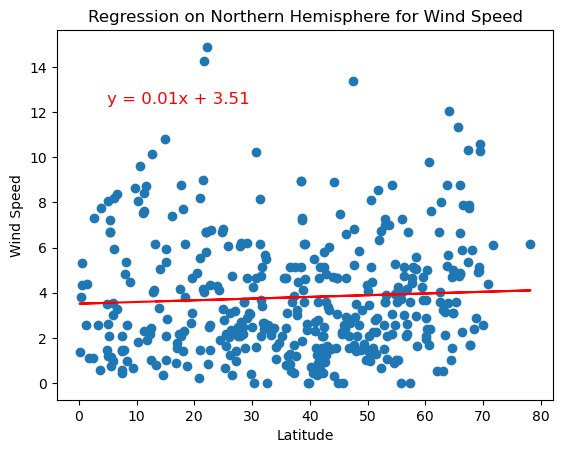

The r-value is: 0.002991210706102294


In [111]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Wind Speed"]
title = 'Regression on Northern Hemisphere for Wind Speed'
ylabs = 'Wind Speed'
text_position = (0.1, 0.8)
# Call the function
plot_regression(x_val, y_val, title, ylabs, text_position)

# Print the r-value
(slope, intercept, r_value, _, _) = linregress(x_val, y_val)
print(f"The r-value is: {r_value**2}")

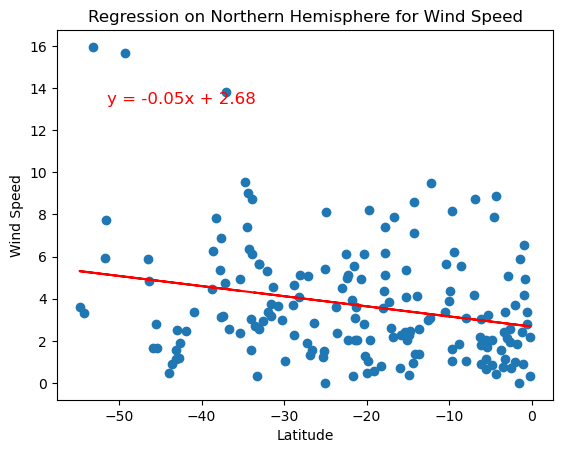

The r-value is: 0.06292638811239948


In [113]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Wind Speed"]
title = 'Regression on Northern Hemisphere for Wind Speed'
ylabs = 'Wind Speed'
text_position = (0.1, 0.8)
# Call the function
plot_regression(x_val, y_val, title, ylabs, text_position)

# Print the r-value
(slope, intercept, r_value, _, _) = linregress(x_val, y_val)
print(f"The r-value is: {r_value**2}")

**Discussion about the linear relationship:** 

In the Northern Hemisphere, the linear regression between latitude and wind speed is represented by the equation y = 0.01x + 3.51, with an R-squared value of 0.003. This extremely low R-squared value indicates that there is essentially no correlation between latitude and wind speed in the Northern Hemisphere. The positive slope of the line is very shallow, implying that even if there is a relationship, it is very weak.
In the Southern Hemisphere, the linear regression equation is y = -0.05x + 2.68, with an R-squared value of 0.0629. This R-squared value is slightly higher than that of the Northern Hemisphere but still indicates a weak correlation. The negative slope suggests a mild decrease in wind speed as one moves closer to the equator.
In conclusion, both the Northern and Southern Hemispheres do not show a significant correlation between latitude and wind speed. This suggests that wind speed is likely influenced by other factors such as geographic features, atmospheric pressure systems, and local weather patterns, rather than latitude alone.